In [1]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt

/Users/natalie/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [ ]:
with open(f"/Users/natalie/Desktop/DS Thesis/user-churn-prediction/checkpoints/hyper_nothing_model.pkl", "rb") as f:
    hyper_nothing = pickle.load(f)
with open(f"/Users/natalie/Desktop/DS Thesis/user-churn-prediction/checkpoints/nothing_model_200_estimators.pkl", "rb") as f:
    normal_nothing = pickle.load(f)

In [3]:
normal_score = normal_nothing['score_df']
normal_score['model_name'] = ['lr', 'rf','lgb','xgb','mlp']
hyper_score = hyper_nothing['score_df']
hyper_score['model_name'] = ['lr', 'rf','lgb','xgb','mlp']
normal_score['type'] = 'no-tune'
hyper_score['type'] = 'tune'

In [8]:
df = pd.concat([normal_score, hyper_score])
df

,model_name,accuracy_score,f1_score,auc_score,specificity_score,sensitivity_score,type
0,lr,0.821340,0.766071,0.882068,0.865410,0.685259,no-tune
1,rf,0.820295,0.767212,0.890830,0.859062,0.700589,no-tune
2,lgb,0.835630,0.786650,0.905045,0.870282,0.728631,no-tune
3,xgb,0.836640,0.787484,0.905264,0.872142,0.727016,no-tune
4,mlp,0.831910,0.782919,0.900963,0.865119,0.729367,no-tune
0,lr,0.821340,0.766071,0.882068,0.865410,0.685259,tune
1,rf,0.836955,0.785171,0.903207,0.878986,0.707170,tune
2,lgb,0.836160,0.787486,0.905551,0.870262,0.730859,tune
3,xgb,0.837880,0.787703,0.905978,0.876418,0.718882,tune
4,mlp,0.834835,0.784627,0.903063,0.872195,0.719474,tune


In [6]:
cols = [('no-tune',  'lr'),(   'tune',  'lr'),('no-tune',  'rf'),(   'tune',  'rf'),('no-tune', 'lgb'),(   'tune', 'lgb'),('no-tune', 'xgb'),(   'tune', 'xgb'),('no-tune', 'mlp'),(   'tune', 'mlp')]
df.set_index(['type','model_name']).transpose()[cols].to_csv('/Users/natalie/Desktop/DS Thesis/user-churn-prediction/outputs/tune_compare_notune.csv')

Text(0.5, 1.0, 'accuracy')

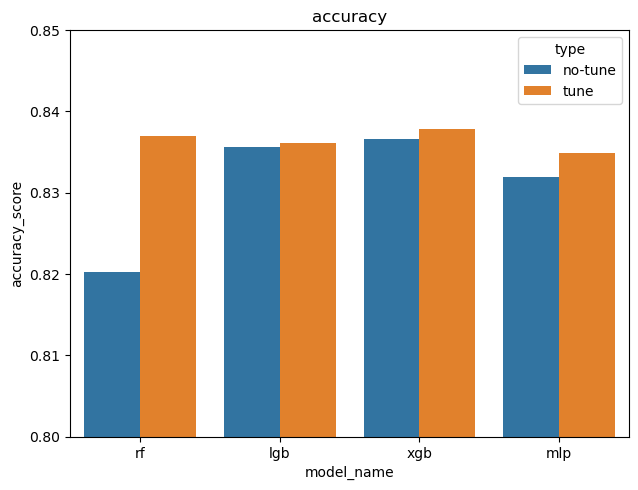

In [9]:
sns.barplot(x='model_name', y='accuracy_score',hue='type',data=df[df.model_name.apply(lambda x: 'lr' not in x)])
plt.tight_layout()
plt.ylim(0.8,0.85)
plt.title('accuracy')

Text(0.5, 1.0, 'accuracy')

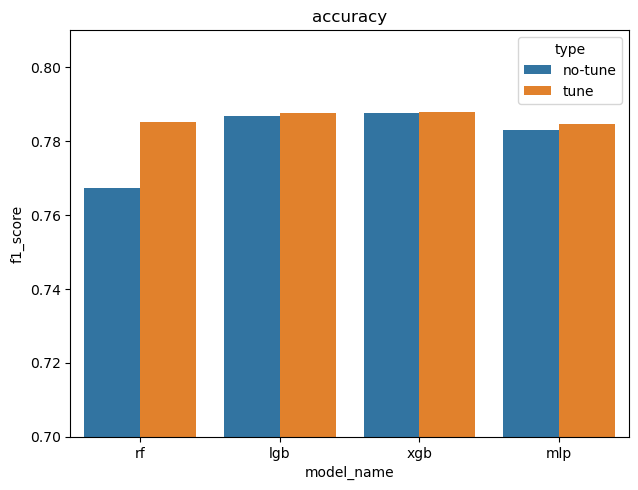

In [14]:
sns.barplot(x='model_name', y='f1_score',hue='type',data=df[df.model_name.apply(lambda x: 'lr' not in x)])
plt.tight_layout()
plt.ylim(0.7,0.81)
plt.title('F1_score')

Text(0.5, 1.0, 'auc score')

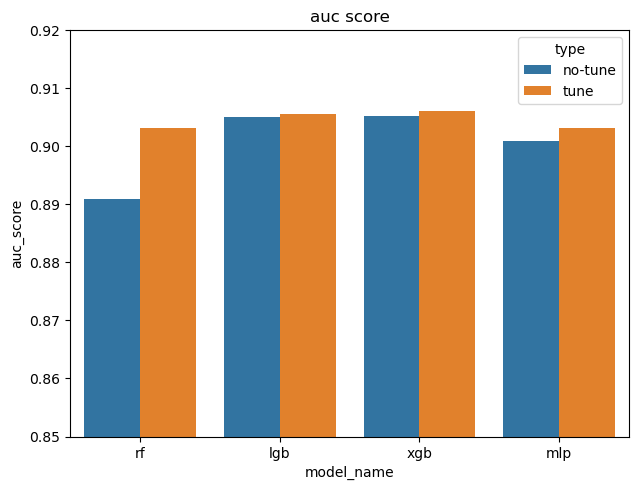

In [17]:
sns.barplot(x='model_name', y='auc_score',hue='type',data=df[df.model_name.apply(lambda x: 'lr' not in x)])
plt.tight_layout()
plt.ylim(0.85,0.92)
plt.title('auc score')

Text(0.5, 1.0, 'auc score')

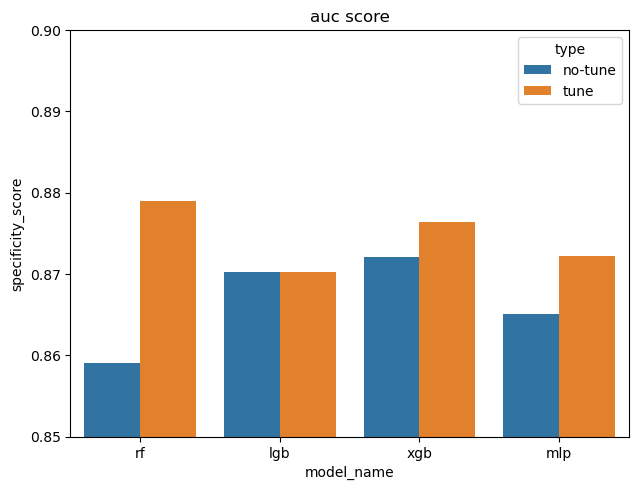

In [19]:
sns.barplot(x='model_name', y='specificity_score',hue='type',data=df[df.model_name.apply(lambda x: 'lr' not in x)])
plt.tight_layout()
plt.ylim(0.85,0.90)
plt.title('specificity_score')

Text(0.5, 1.0, 'sensitivity_score')

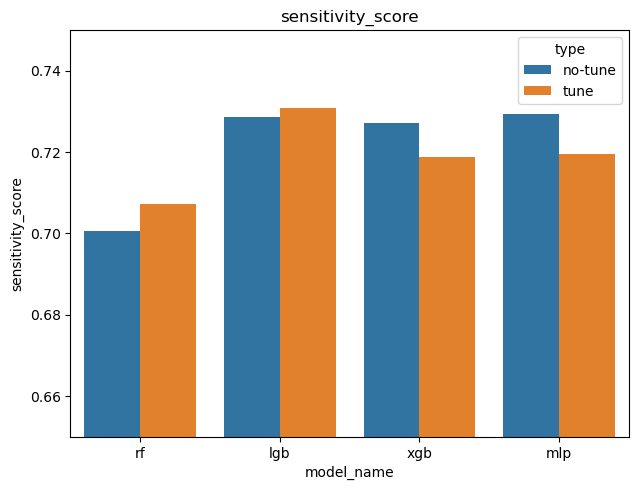

In [22]:
sns.barplot(x='model_name', y='sensitivity_score',hue='type',data=df[df.model_name.apply(lambda x: 'lr' not in x)])
plt.tight_layout()
plt.ylim(0.65,0.75)
plt.title('sensitivity_score')